# 2018 Ford GoBike System Dataset Exploration



Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. There are different variables like trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

# Gathering Data

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os


In [73]:
folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

(1863721, 14)


duration_sec                start_time                  end_time  \
1783071           202  2018-12-17 21:24:54.9080  2018-12-17 21:28:17.1090   
46027             889  2018-01-18 18:07:54.4540  2018-01-18 18:22:44.3790   
1147207           688  2018-08-10 17:38:25.7240  2018-08-10 17:49:53.9740   
949815            349  2018-07-12 09:20:28.6520  2018-07-12 09:26:18.1400   
1566910           299  2018-10-05 08:35:31.8790  2018-10-05 08:40:31.7410   

         start_station_id                            start_station_name  \
1783071             198.0                                     Snow Park   
46027                58.0                          Market St at 10th St   
1147207              58.0                          Market St at 10th St   
949815                5.0  Powell St BART Station (Market St at 5th St)   
1566910             195.0                           Bay Pl at Vernon St   

         start_station_latitude  start_station_longitude  end_station_id  \
1783071               37.807813              -122.264496           195.0   
46027                 37.776619              -122.417385           115.0   
1147207               37.776619              -122.417385            81.0   
949815                37.783899              -122.408445            21.0   
1566910               37.812314              -122.260779           337.0   

                                         end_station_name  \
1783071                               Bay Pl at Vernon St   
46027                                  Jackson Playground   
1147207                                Berry St at 4th St   
949815   Montgomery St BART Station (Market St at 2nd St)   
1566910                             Webster St at 19th St   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1783071             37.812314            -122.260779     1926  Subscriber   
46027               37.765026            -122.398773     2703  Subscriber   
1147207             37.775880            -122.393170     1303    Customer   
949815              37.789625            -122.400811     4066  Subscriber   
1566910             37.806970            -122.266588      765  Subscriber   

        bike_share_for_all_trip  
1783071                      No  
46027                        No  
1147207                      No  
949815                       No  
1566910                      No

In [74]:
#save the result of appended files in a csv file
result.to_csv('fordgobike_2018.csv', index=False)

In [76]:
#Creating new dataframe for reading fordgobike_2018
biketrip2018 = pd.read_csv('fordgobike_2018.csv')
biketrip2018.head()

duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0             120.0                               Mission Dolores Park   
1              15.0  San Francisco Ferry Building (Harry Bridges Pl...   
2             304.0                               Jackson St at 5th St   
3              75.0                           Market St at Franklin St   
4              74.0                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435           285.0   
1               37.795392              -122.394203            15.0   
2               37.348759              -121.894798           296.0   
3               37.773793              -122.421239            47.0   
4               37.776435              -122.426244            19.0   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
2                              5th St at Virginia St             37.325998   
3                              4th St at Harrison St             37.780955   
4                               Post St at Kearny St             37.788975   

   end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0            -122.431158     2765  Subscriber                      No  
1            -122.394203     2815    Customer                      No  
2            -121.877120     3039    Customer                      No  
3            -122.399749      321    Customer                      No  
4            -122.403452      617  Subscriber                      No

In [77]:
biketrip2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [78]:
biketrip2018.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [79]:
biketrip2018.duplicated().sum()

0

In [80]:
biketrip2018.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [81]:
biketrip2018.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

In [82]:
biketrip2018.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
San Francisco Caltrain (Townsend St at 4th St)               35092
Market St at 10th St                                         34918
Berry St at 4th St                                           33716
                                                             ...  
William St at 4th St (Temporary Location)                       26
Viva Calle SJ                                                   25
Williams Ave at 3rd St                                          17
Farnam St at Fruitvale Ave                                      14
2nd St at S Park St                                             11
Name: start_station_name, Length: 348, dtype: int64

# Cleaning Data 

#### Fix datatypes of different columns

In [83]:


#Copy the data in new dataframe

trip_2018 = biketrip2018.copy()

#start time and end time to date and time format
trip_2018['start_time'] = pd.to_datetime(trip_2018['start_time'])
trip_2018['end_time'] = pd.to_datetime(trip_2018['end_time'])

#id into string
trip_2018['start_station_id'] = trip_2018['start_station_id'].astype('str')
trip_2018['end_station_id'] = trip_2018['end_station_id'].astype('str')
trip_2018['bike_id'] = trip_2018['bike_id'].astype('str')

#type into category
trip_2018['user_type'] = trip_2018['user_type'].astype('category')

trip_2018.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

In [84]:
trip_2018.dropna(inplace=True)
trip_2018.reset_index(inplace=True, drop=True)

In [85]:
# Add new column for trip duration in minute


trip_2018['duration_minute'] = trip_2018['duration_sec']/60

#Add new columns for trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month
trip_2018['start_date'] = trip_2018.start_time.dt.strftime('%Y-%m-%d')
trip_2018['start_hour_day'] = trip_2018.start_time.dt.strftime('%H')
trip_2018['start_day_week'] = trip_2018.start_time.dt.strftime('%A')
trip_2018['start_month'] = trip_2018.start_time.dt.strftime('%B')

trip_2018.head()

duration_sec              start_time                end_time  \
0         75284 2018-01-31 22:52:35.239 2018-02-01 19:47:19.824   
1         85422 2018-01-31 16:13:34.351 2018-02-01 15:57:17.310   
2         71576 2018-01-31 14:23:55.889 2018-02-01 10:16:52.116   
3         61076 2018-01-31 14:53:23.562 2018-02-01 07:51:20.500   
4         39966 2018-01-31 19:52:24.667 2018-02-01 06:58:31.053   

  start_station_id                                 start_station_name  \
0            120.0                               Mission Dolores Park   
1             15.0  San Francisco Ferry Building (Harry Bridges Pl...   
2            304.0                               Jackson St at 5th St   
3             75.0                           Market St at Franklin St   
4             74.0                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.761420              -122.426435          285.0   
1               37.795392              -122.394203           15.0   
2               37.348759              -121.894798          296.0   
3               37.773793              -122.421239           47.0   
4               37.776435              -122.426244           19.0   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
2                              5th St at Virginia St             37.325998   
3                              4th St at Harrison St             37.780955   
4                               Post St at Kearny St             37.788975   

   end_station_longitude bike_id   user_type bike_share_for_all_trip  \
0            -122.431158    2765  Subscriber                      No   
1            -122.394203    2815    Customer                      No   
2            -121.877120    3039    Customer                      No   
3            -122.399749     321    Customer                      No   
4            -122.403452     617  Subscriber                      No   

   duration_minute  start_date start_hour_day start_day_week start_month  
0      1254.733333  2018-01-31             22      Wednesday     January  
1      1423.700000  2018-01-31             16      Wednesday     January  
2      1192.933333  2018-01-31             14      Wednesday     January  
3      1017.933333  2018-01-31             14      Wednesday     January  
4       666.100000  2018-01-31             19      Wednesday     January

In [86]:
# no null values in our data set
trip_2018.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
duration_minute            0
start_date                 0
start_hour_day             0
start_day_week             0
start_month                0
dtype: int64

In [87]:
trip_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  duration_minute          float64       
 15  start_date               object        
 16  start_hour_day           object        
 17  start_day_week           ob

In [88]:
trip_2018.shape

(1851950, 19)

In [89]:
#Saving the whole cleaned data in csv file
trip_2018.to_csv("trip_2018.csv",index = False)

# What is the structure of dataset?

Originally there were approx. 1851950 bike rides that happen in 2018 and their are different attributes  

* trip duration in sec
* start and end time of trip
* user type 
* start and end station name
* start and end station id
* Bike id




# Univariate Exploration

In [22]:
trip_2018['duration_minute'].describe()

count    1.851950e+06
mean     1.421666e+01
std      3.899084e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.250000e+00
75%      1.450000e+01
max      1.439433e+03
Name: duration_minute, dtype: float64

## Define
##### A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

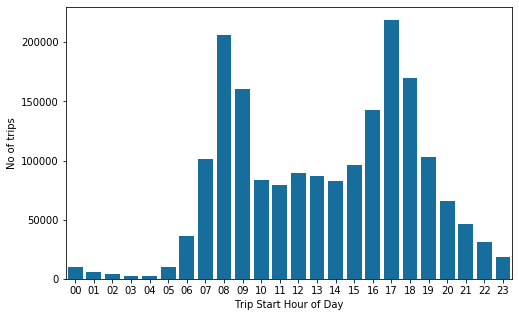

In [23]:

plt.figure(figsize=[8, 5])
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data=trip_2018, x='start_hour_day', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('No of trips');

## Conclusion
#### It shows that most of the trip duration is starting at morning 06:00 am to evening 08:00pm

## Define
### Trip distribution over weekdays

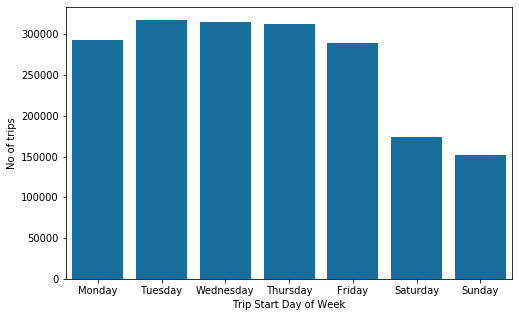

In [24]:

# cast 'start_day_week' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trip_2018['start_day_week'] = trip_2018['start_day_week'].astype(weekdaycat)

plt.figure(figsize=[8, 5])
sb.countplot(data=trip_2018, x='start_day_week', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('No of trips');

## Conclusion
#### It shows that most of the people like to trip in Monday, Tuesday, Wednesday, Thrusday, Friday

## Define
### Trip distribution over months

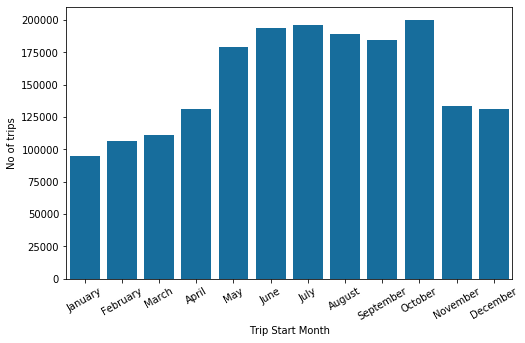

In [25]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trip_2018['start_month'] = trip_2018['start_month'].astype(monthcat)
plt.figure(figsize=[8, 5])
sb.countplot(data=trip_2018, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('No of trips');


# Conclusion

### Above plot shows us that the trip duration over the years most in october and less in january 

# Define
#### Visulaizing the no of subscriber and Customer

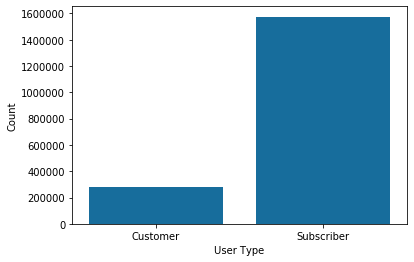

In [26]:

sb.countplot(data=trip_2018, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

# Conclusion

### Above plot shows us that the no of subsciber is more than customer 

# Define
#### Visualizing the riders who use bike share for all trips

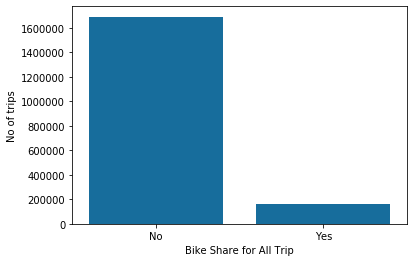

In [27]:

sb.countplot(data=trip_2018, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('No of trips');

# Conclusion

#### Most of the riders did not use the bike share for all trips.

## Bike Ride Duration Time Visualization:


In [28]:
trip_2018.duration_minute.describe()

count    1.851950e+06
mean     1.421666e+01
std      3.899084e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.250000e+00
75%      1.450000e+01
max      1.439433e+03
Name: duration_minute, dtype: float64

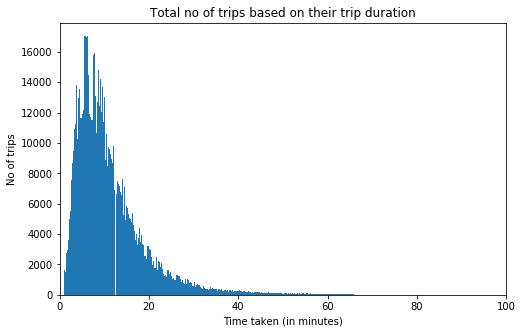

In [64]:
# start with a standard-scaled plot

binsize = .1
bins = np.arange(0, trip_2018['duration_minute'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = trip_2018, x = 'duration_minute', bins = bins)
plt.xlim(0,100)
plt.xlabel('Time taken (in minutes)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

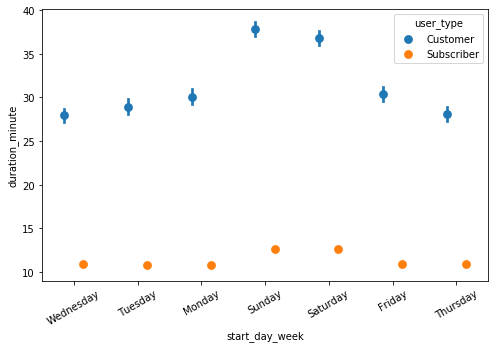

In [92]:
plt.figure(figsize=[8, 5])
sb.pointplot(data=trip_2018, x='start_day_week', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");

plt.xticks(rotation=30);



## Conclusion
#### It shows that most of the trip duration is less than 25 minutes. After removing the outler we can focus on the most common cases

In [30]:
#After filltering the outlier from dataset
trip_2018 = trip_2018[trip_2018['duration_minute'] <= 66]
trip_2018.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824136 entries, 6 to 1851949
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1824136 non-null  int64         
 1   start_time               1824136 non-null  datetime64[ns]
 2   end_time                 1824136 non-null  datetime64[ns]
 3   start_station_id         1824136 non-null  object        
 4   start_station_name       1824136 non-null  object        
 5   start_station_latitude   1824136 non-null  float64       
 6   start_station_longitude  1824136 non-null  float64       
 7   end_station_id           1824136 non-null  object        
 8   end_station_name         1824136 non-null  object        
 9   end_station_latitude     1824136 non-null  float64       
 10  end_station_longitude    1824136 non-null  float64       
 11  bike_id                  1824136 non-null  object        
 12  

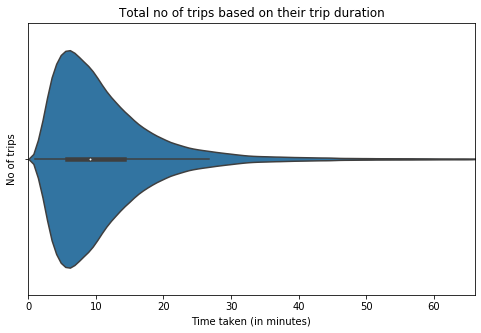

In [31]:

binsize = .1
bins = np.arange(0, trip_2018['duration_minute'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
sb.violinplot(data = trip_2018, x = 'duration_minute', bins = bins)
plt.xlim(0,66)
plt.xlabel('Time taken (in minutes)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

In [32]:
#Saving the whole cleaned data in csv file
trip_2018.to_csv("cleaned_trip_2018.csv",index = False)

# Bivariate Exploration

In [33]:
df  = pd.read_csv("cleaned_trip_2018.csv")

# Define:
#### How does the trip duration distribution vary between the coustomers and subscribers?


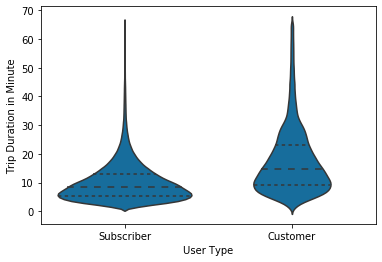

In [34]:
sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

# Conclusion:
#### Above plot shows that trip duration disturibution for susbscribers is much narrower compared to casual riders. It's like subscribers have a more specific usage compard to customers

# Define
#### How is the avg. trip duratoin in minutes varies in day of week and months

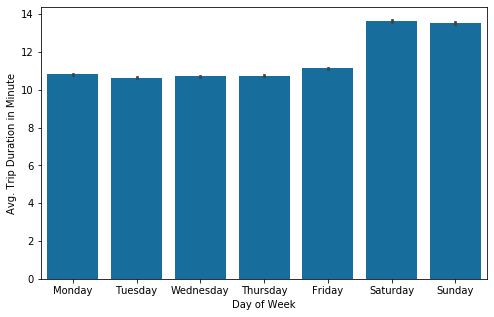

In [35]:
plt.figure(figsize=[8, 5])
sb.barplot(data=df, x='start_day_week', y='duration_minute', order = weekday,color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

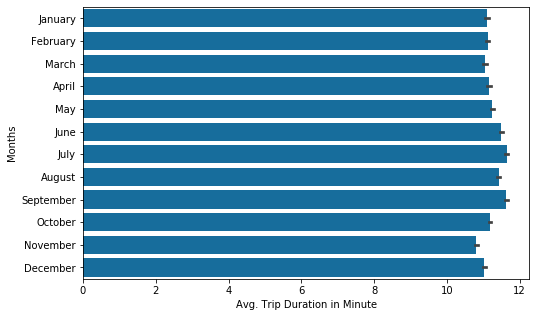

In [36]:
plt.figure(figsize=[8, 5])

sb.barplot(data=df, y='start_month', x='duration_minute', order =month,color=base_color);
plt.ylabel('Months');
plt.xlabel('Avg. Trip Duration in Minute');


# Conclusion
* As we can see in monday to friday the average of riding trips is much shorter it's almost 11 minutes and in weekends it's 14 minutes.
* According to our 2nd barplot we can see the avg. Trip duration did not varies to much. Avg trip duration is maximum in july or september

# Define:
* How the subscribers or customers using this service over weekdays
* How the usage of service varies between customers and subscribers in daily hours
* How the usage of service varies betweem customers and subscribers in months

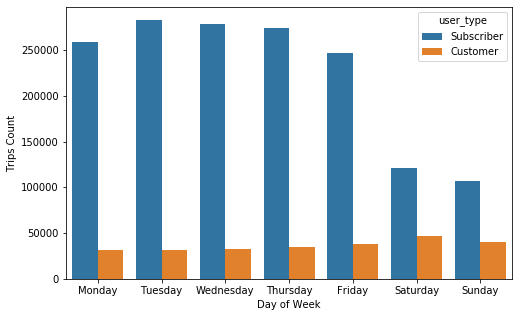

In [37]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='start_day_week', hue='user_type', order = weekday);
plt.xlabel('Day of Week');
plt.ylabel('Trips Count');

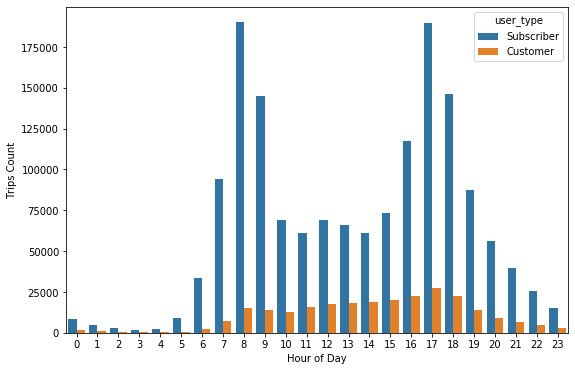

In [38]:
plt.figure(figsize=[9, 6])
sb.countplot(data=df, x='start_hour_day', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Trips Count');

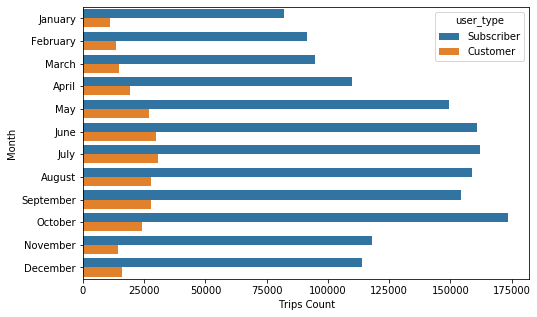

In [39]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df, y='start_month', hue='user_type', order =month);
plt.xlabel('Trips Count');
plt.ylabel('Month');

# Conclusion:
* Subscriber usage of the service is much more than causual customers. During workdays most of the mostly subsriber use the bike service. In weekends it falls down on the other side casual customer uses have been increases in weekends. 
* Subscribers uses this service in mostly rush hours of the day as we can see in plot. When people go to work at 8:00 am the no of rides increases dramtically and it also increases at 5:00 pm when getting off work in the afternoon 
* Both of the user type mostly uses the bike service in summer months. Subscribers uses bike service mostly in october on the other hand casual customer uses this bike service mostly in july.

# Multivariate Exploration

# Define
#### Let's see the pair wise gribe of numeric values in our data set


In [47]:



numeric_values = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'duration_minute']
numeric = ['duration_minutes']
categoric_values = ['start_time_day_week', 'start_time_hour', 'user_type']
num_val = ['duration_sec','start_station_latitude','start_station_longitude','end_station_longitude',
          'end_station_longitude']

<Figure size 720x720 with 0 Axes>

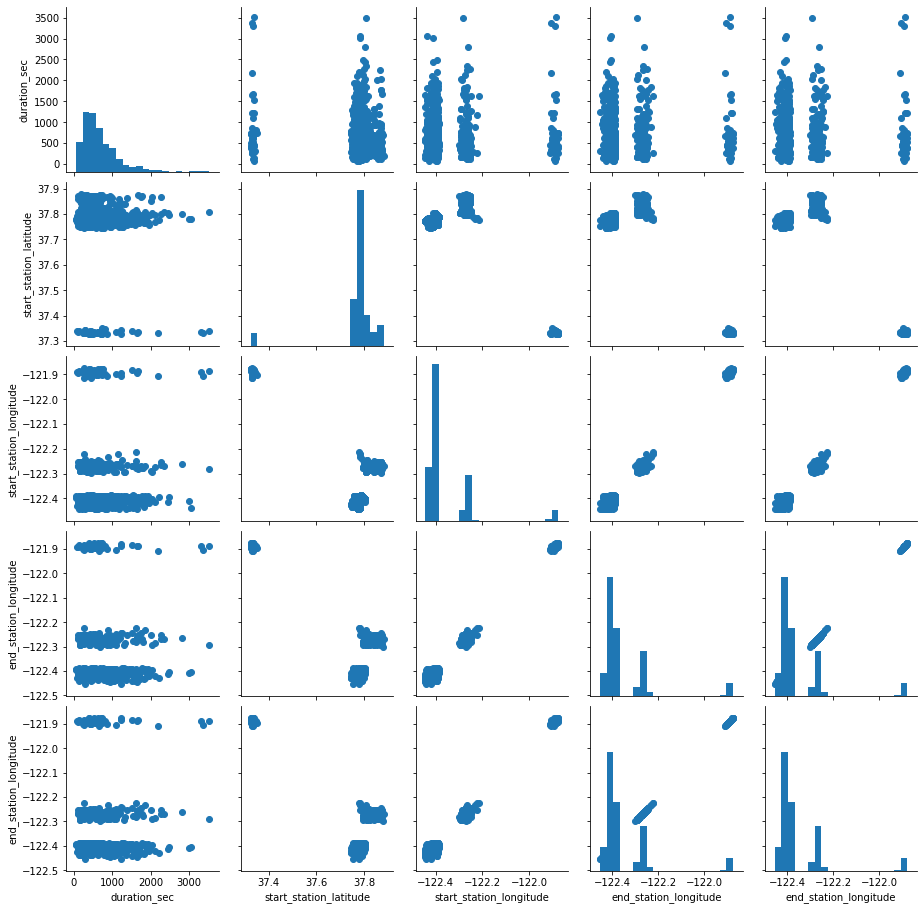

In [49]:
samples_data = np.random.choice(df.shape[0],1000, replace = False)
# Using sample_data helps in fast execution
plt.figure(figsize = [10, 10])
df_sample = df.loc[samples_data,:]
g = sb.PairGrid(data = df_sample, vars = num_val)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

# Conclusion:
* As we can see in above diagram there is no linear dependency among any two variables. Most of them are divided in segments either vertically or horizontally.

# Define
 Lets find out the correlation between various numeric values

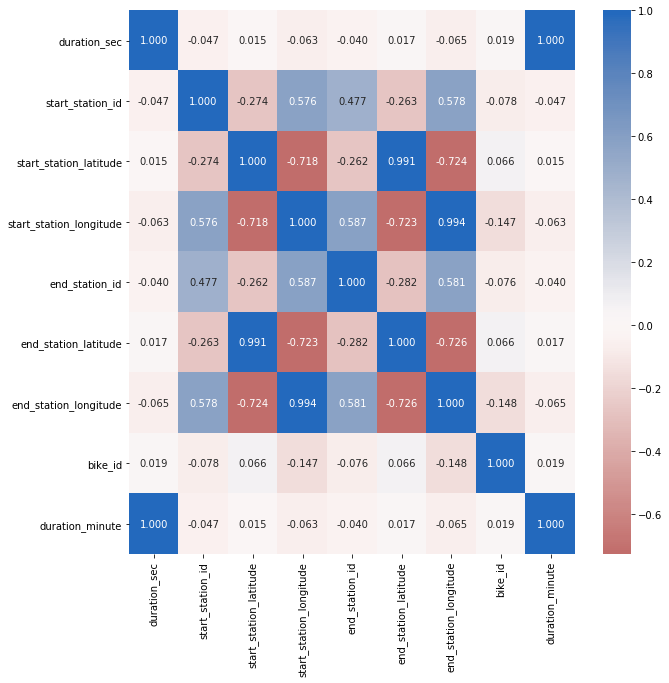

In [33]:

# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(df[numeric_values].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

## Conclusion

#### The correlatoin coffecients shows that their might be correlations between the following pairs of variables:
* start_station_id, end_station_id
* start_station_latitue, start_station_longitude
* end_station_latitue, end_station_longitue

In [55]:
df_sub = df[df['user_type']=="Subscriber"].groupby(['start_hour_day','start_day_week']).agg({'bike_id' :'count'})
df_sub = df_sub.pivot_table(index= 'start_hour_day', columns = 'start_day_week', values = 'bike_id')

df_cus =  df[df['user_type']=="Customer"].groupby(['start_hour_day','start_day_week']).agg({'bike_id' :'count'})
df_cus = df_cus.pivot_table(index= 'start_hour_day', columns = 'start_day_week', values = 'bike_id')                                                                          

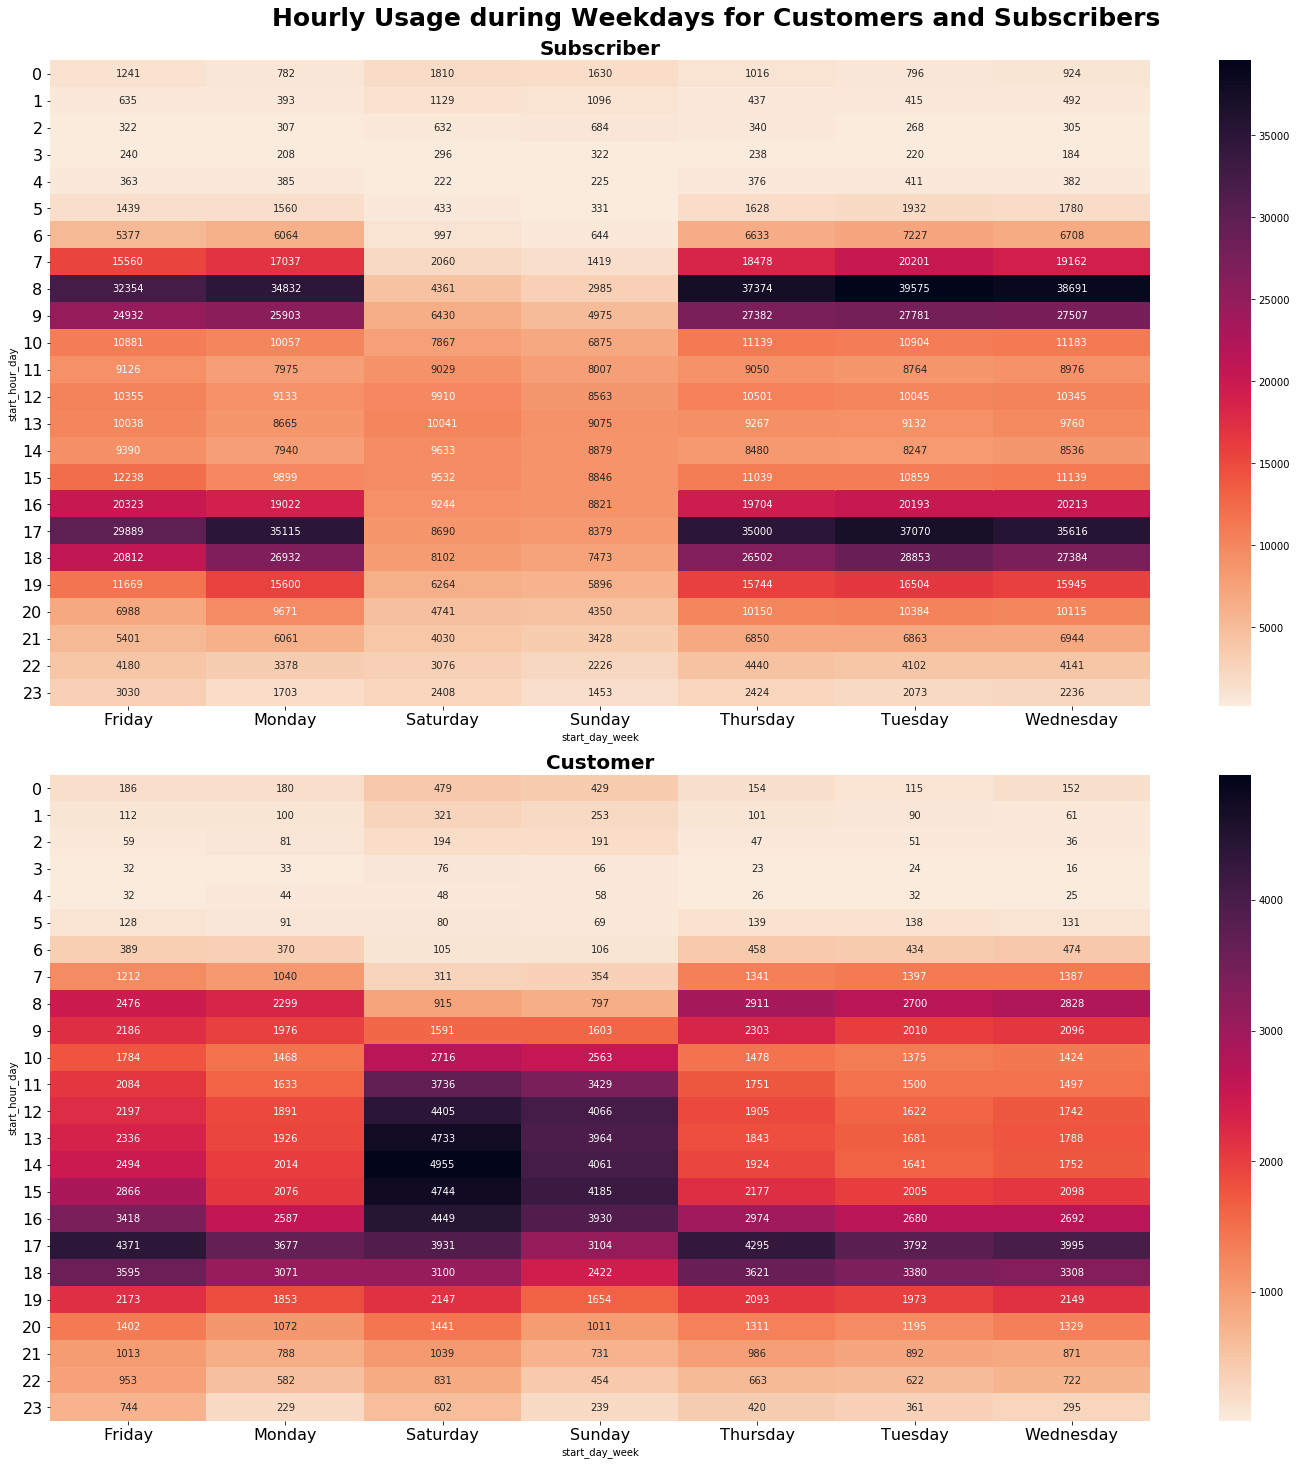

In [63]:

plt.subplots(figsize=(20,20))

# df_sub
fig1 = plt.subplot(2,1,1)
ax1 = sb.heatmap(df_sub, annot=True, fmt='d', cmap='rocket_r')

plt.title('Subscriber',size=16,fontsize = 20,fontweight='semibold', y=1.015)
plt.yticks(rotation=360,fontsize = 16)
plt.xticks(rotation=360,fontsize = 16)

# df_cus
fig2 = plt.subplot(2,1,2)
ax2 = sb.heatmap(df_cus, annot=True, fmt='d', cmap='rocket_r')

plt.title('Customer',size=16, fontsize = 20,fontweight='semibold', y=1.015)
plt.yticks(rotation=360,fontsize = 16)
plt.xticks(rotation=360,fontsize = 16)
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=25,fontweight='semibold', y=1.015);plt.tight_layout();

# Conclusion

From the above heat map we can see subscriber's most frequently used time in weekday around 7:00 am and 4-6pm, which are the traveling hours for most of the people. Customer's most frequently used this service in weekend 12:00pm to 4:00 pm